### Loading Packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 1. Dataset Selection and Business Problem Definition

In [3]:
# Load Dataset

df = pd.read_csv("Diwali Sales Data.csv", encoding = 'unicode_escape')

**Business Problem:** To analyse customer purchasing behaviour and predict future purchases to optimize marketing strategies and improve customer satisfaction.

### 2. Data Overview

In [4]:
# Size of the dataset
df.shape

(11251, 15)

In [5]:
# Displaying the first few rows
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


### 3. Data Types Identification

In [7]:
df.dtypes

User_ID               int64
Cust_name            object
Product_ID           object
Gender               object
Age Group            object
Age                   int64
Marital_Status        int64
State                object
Zone                 object
Occupation           object
Product_Category     object
Orders                int64
Amount              float64
Status              float64
unnamed1            float64
dtype: object

### 4. Missing Values Assessment

In [8]:
df.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

### 5. Data Cleaning Strategy

-> The columns 'Status' and 'Unnamed1' are dropped as they contain all null values.

-> 'Amount' column is has only 12 missing values. So, they are imputed with the mean value.

In [9]:
# Fill missing values in the 'Amount' column with the mean
mean_amount = df['Amount'].mean()
df['Amount'].fillna(mean_amount, inplace = True)

# Drop 'Status' and 'Unnamed1' columns
df_cleaned = df.drop(columns=['Status', 'unnamed1'], inplace = True)

In [10]:
# Converting User_ID to object type
df['User_ID'] = df['User_ID'].astype(str)

In [11]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  object 
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11251 non-null  float64
dtypes: float64(1), int64(3), object(9)
memory usage: 1.1+ MB


### 6. Outliers Detection

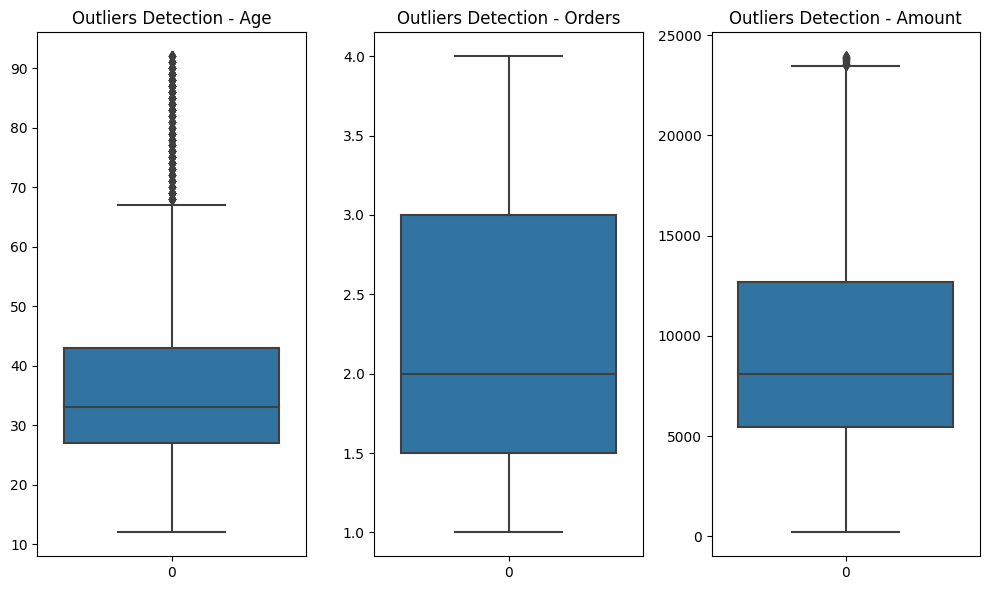

In [13]:
plt.figure(figsize = (10,6))
plt.subplot(1,3,1)
sns.boxplot(data = df['Age'])
plt.title("Outliers Detection - Age")

plt.subplot(1,3,2)
sns.boxplot(data = df['Orders'])
plt.title("Outliers Detection - Orders")

plt.subplot(1,3,3)
sns.boxplot(data = df['Amount'])
plt.title("Outliers Detection - Amount")

plt.tight_layout()

-> Outliers in the data are detected by using the box plot.

### 7. Handling Outliers

In [14]:
# Handling outliers using winsortization

def handle_outliers(column):
    q1 = np.percentile(column, 25)
    q3 = np.percentile(column, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    column = np.where(column > upper_bound, upper_bound, column)
    column = np.where(column < lower_bound, lower_bound, column)
    return column

In [15]:
# Apply winsorization to numerical columns
df['Age'] = handle_outliers(df['Age'])
df['Orders'] = handle_outliers(df['Orders'])
df['Amount'] = handle_outliers(df['Amount'])

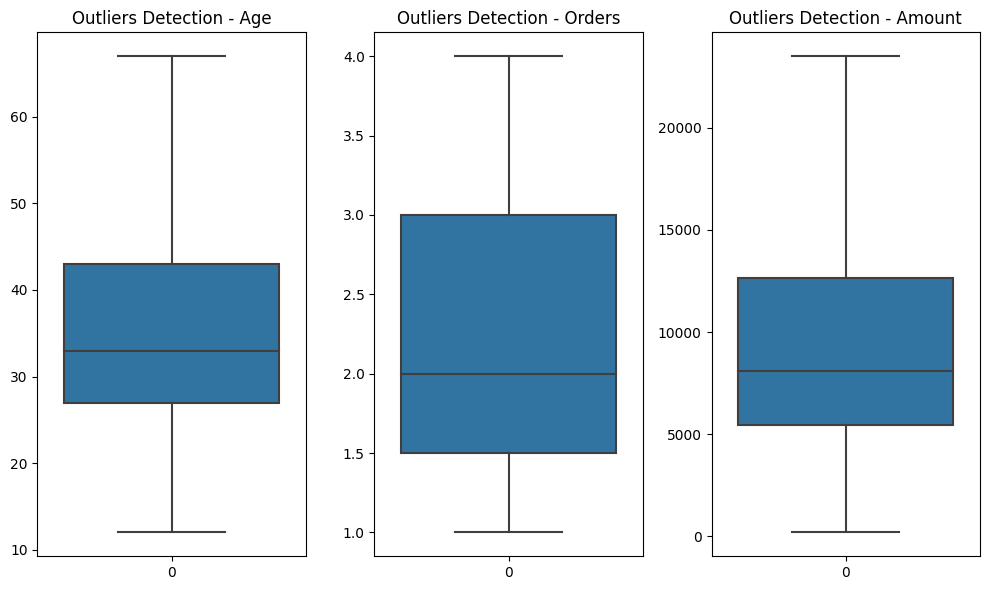

In [16]:
plt.figure(figsize = (10,6))
plt.subplot(1,3,1)
sns.boxplot(data = df['Age'])
plt.title("Outliers Detection - Age")

plt.subplot(1,3,2)
sns.boxplot(data = df['Orders'])
plt.title("Outliers Detection - Orders")

plt.subplot(1,3,3)
sns.boxplot(data = df['Amount'])
plt.title("Outliers Detection - Amount")

plt.tight_layout()

### 10. Exploratory Data Analysis (EDA) Introduction

In [17]:
selected_variables = ['Age', 'Orders', 'Amount']
summary_statistics = df[selected_variables].describe()
summary_statistics

,Age,Orders,Amount
count,11251.000000,11251.000000,11251.000000
mean,35.095725,2.489290,9453.196451
std,11.683135,1.115047,5218.440666
min,12.000000,1.000000,188.000000
25%,27.000000,1.500000,5443.500000
50%,33.000000,2.000000,8110.000000
75%,43.000000,3.000000,12671.000000
max,67.000000,4.000000,23512.250000


### 11. Visual EDA: Distributions

In [18]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

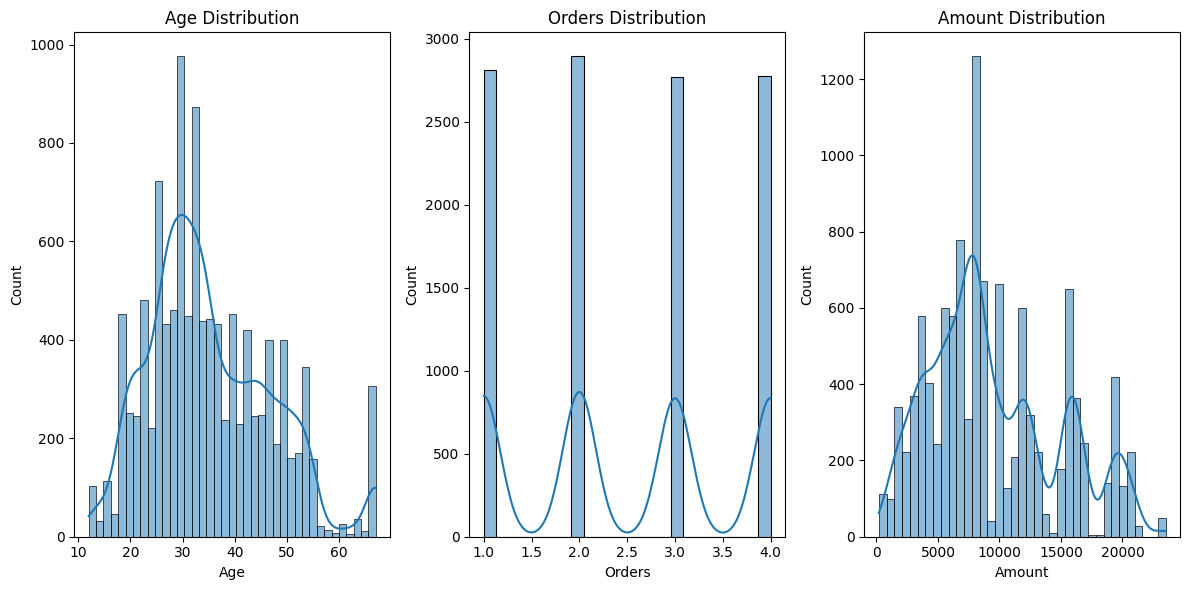

In [19]:
plt.figure(figsize=(12,6))
plt.subplot(1, 3, 1)
sns.histplot(df['Age'], kde=True)
plt.title("Age Distribution")

plt.subplot(1, 3, 2)
sns.histplot(df['Orders'], kde=True)
plt.title("Orders Distribution")

plt.subplot(1, 3, 3)
sns.histplot(df['Amount'], kde=True)
plt.title("Amount Distribution")
plt.tight_layout()

EDA - Gender

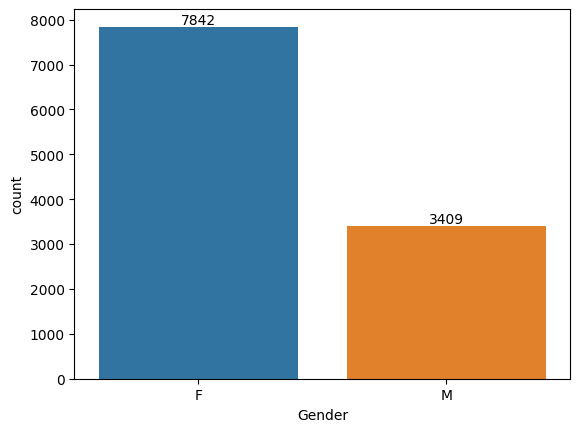

In [20]:
ax = sns.countplot(x = 'Gender', data = df)

for bars in ax.containers:
    ax.bar_label(bars)

In [21]:
df.groupby(['Gender'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False)


,Gender,Orders
0,F,19568.0
1,M,8439.0


<Axes: xlabel='Gender', ylabel='Orders'>

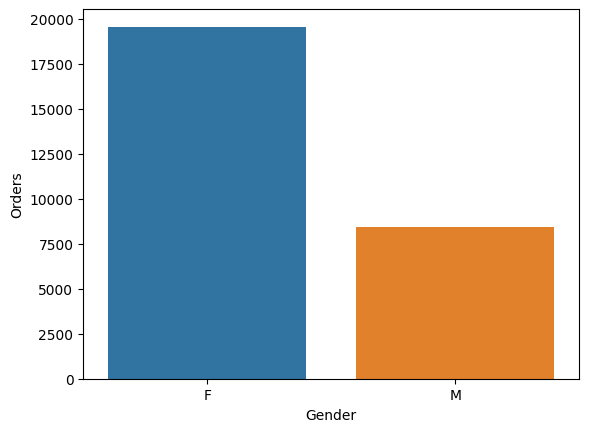

In [22]:
sales_gen = df.groupby(['Gender'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False)
sns.barplot(x = 'Gender', y = 'Orders', data = sales_gen)

-> From the above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men.

EDA - Age

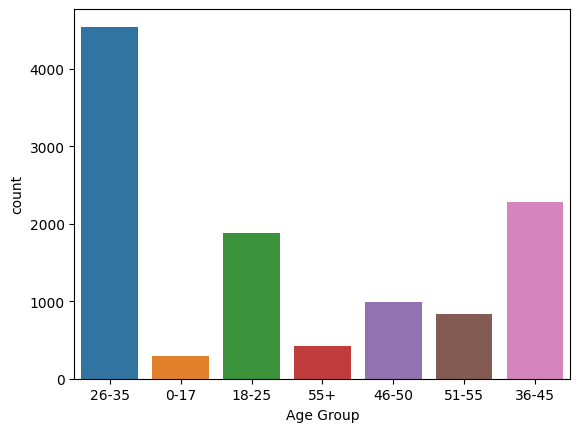

In [23]:
ax = sns.countplot(data = df, x = 'Age Group')

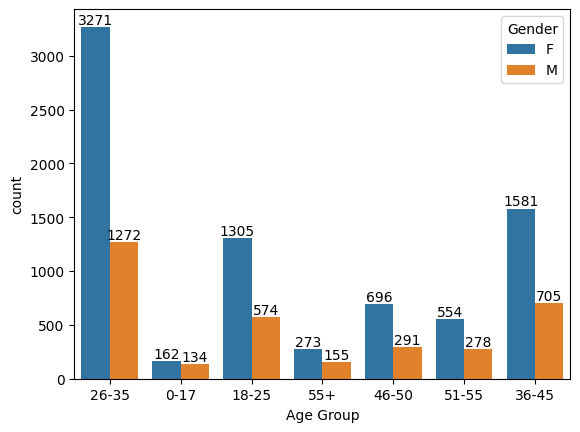

In [24]:
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Orders'>

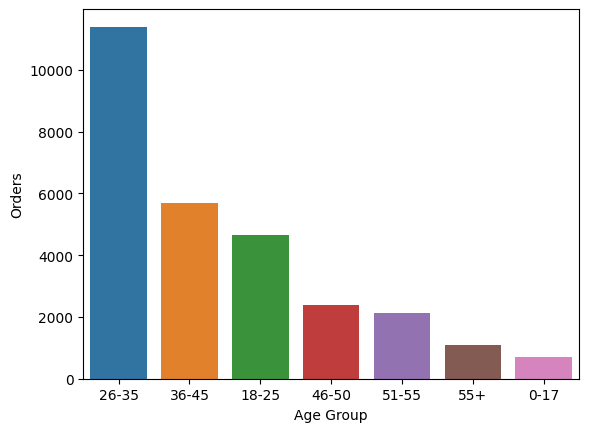

In [25]:
# Total Orders vs Age Group
sales_age = df.groupby(['Age Group'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False)
sns.barplot(x = 'Age Group', y = 'Orders', data = sales_age)

-> From the above graphs we can see that most of the buyers are of age group 26-35 years female

EDA - State

<Axes: xlabel='State', ylabel='Orders'>

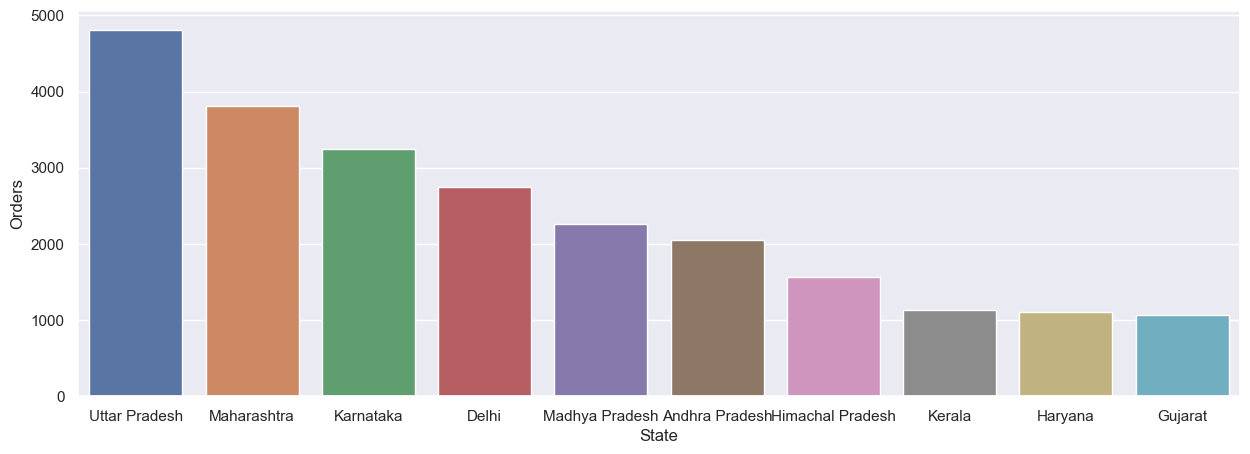

In [26]:
# Total number of orders from top 10 states
sales_state = df.groupby(['State'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)

sns.set(rc={'figure.figsize': (15, 5)})
sns.barplot(x = 'State', y = 'Orders', data = sales_state)

<Axes: xlabel='State', ylabel='Amount'>

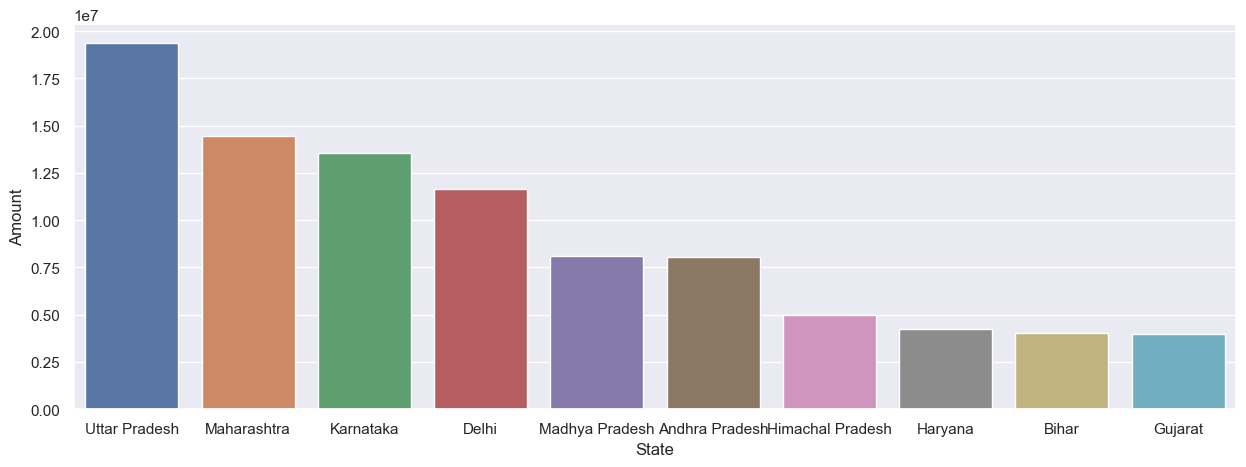

In [27]:
# Total amount/sales from top 10 states
sales_state = df.groupby(['State'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)

sns.set(rc={'figure.figsize': (15, 5)})
sns.barplot(x = 'State', y = 'Amount', data = sales_state)

->  From the above graphs it can be observed that most of the orders and total sales are from Uttar Pradesh, Maharashtra and Karnataka respectively.

### 12. Visual EDA: Relationships

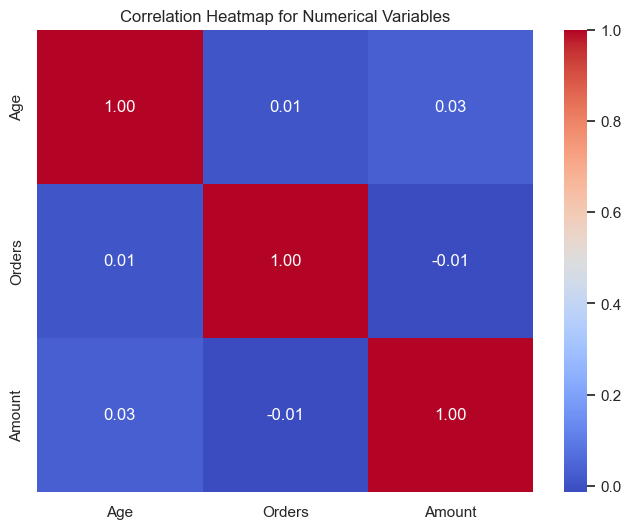

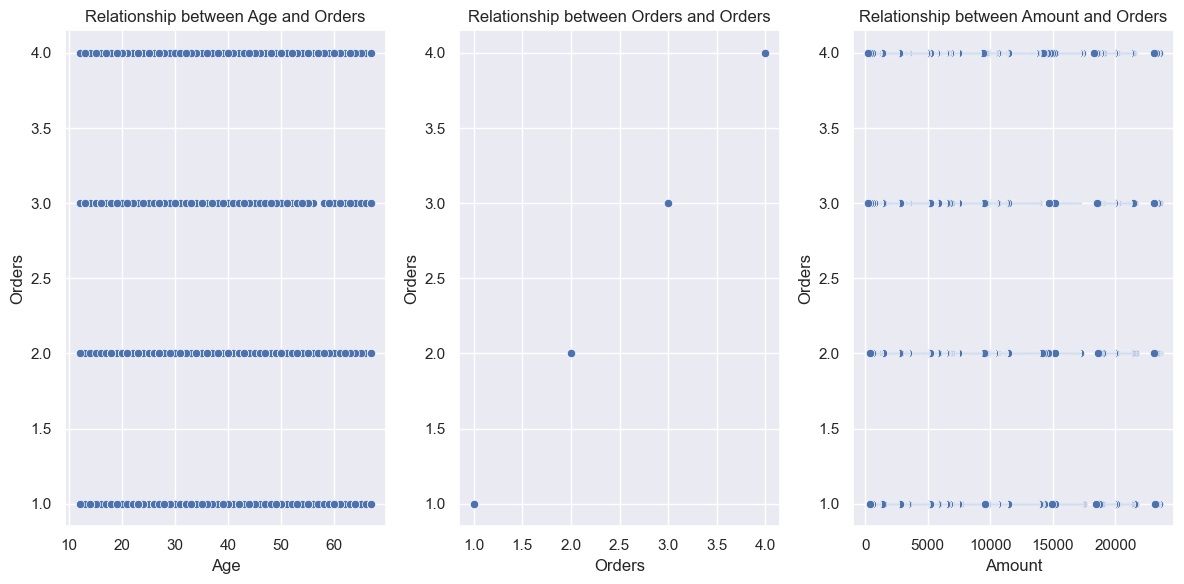

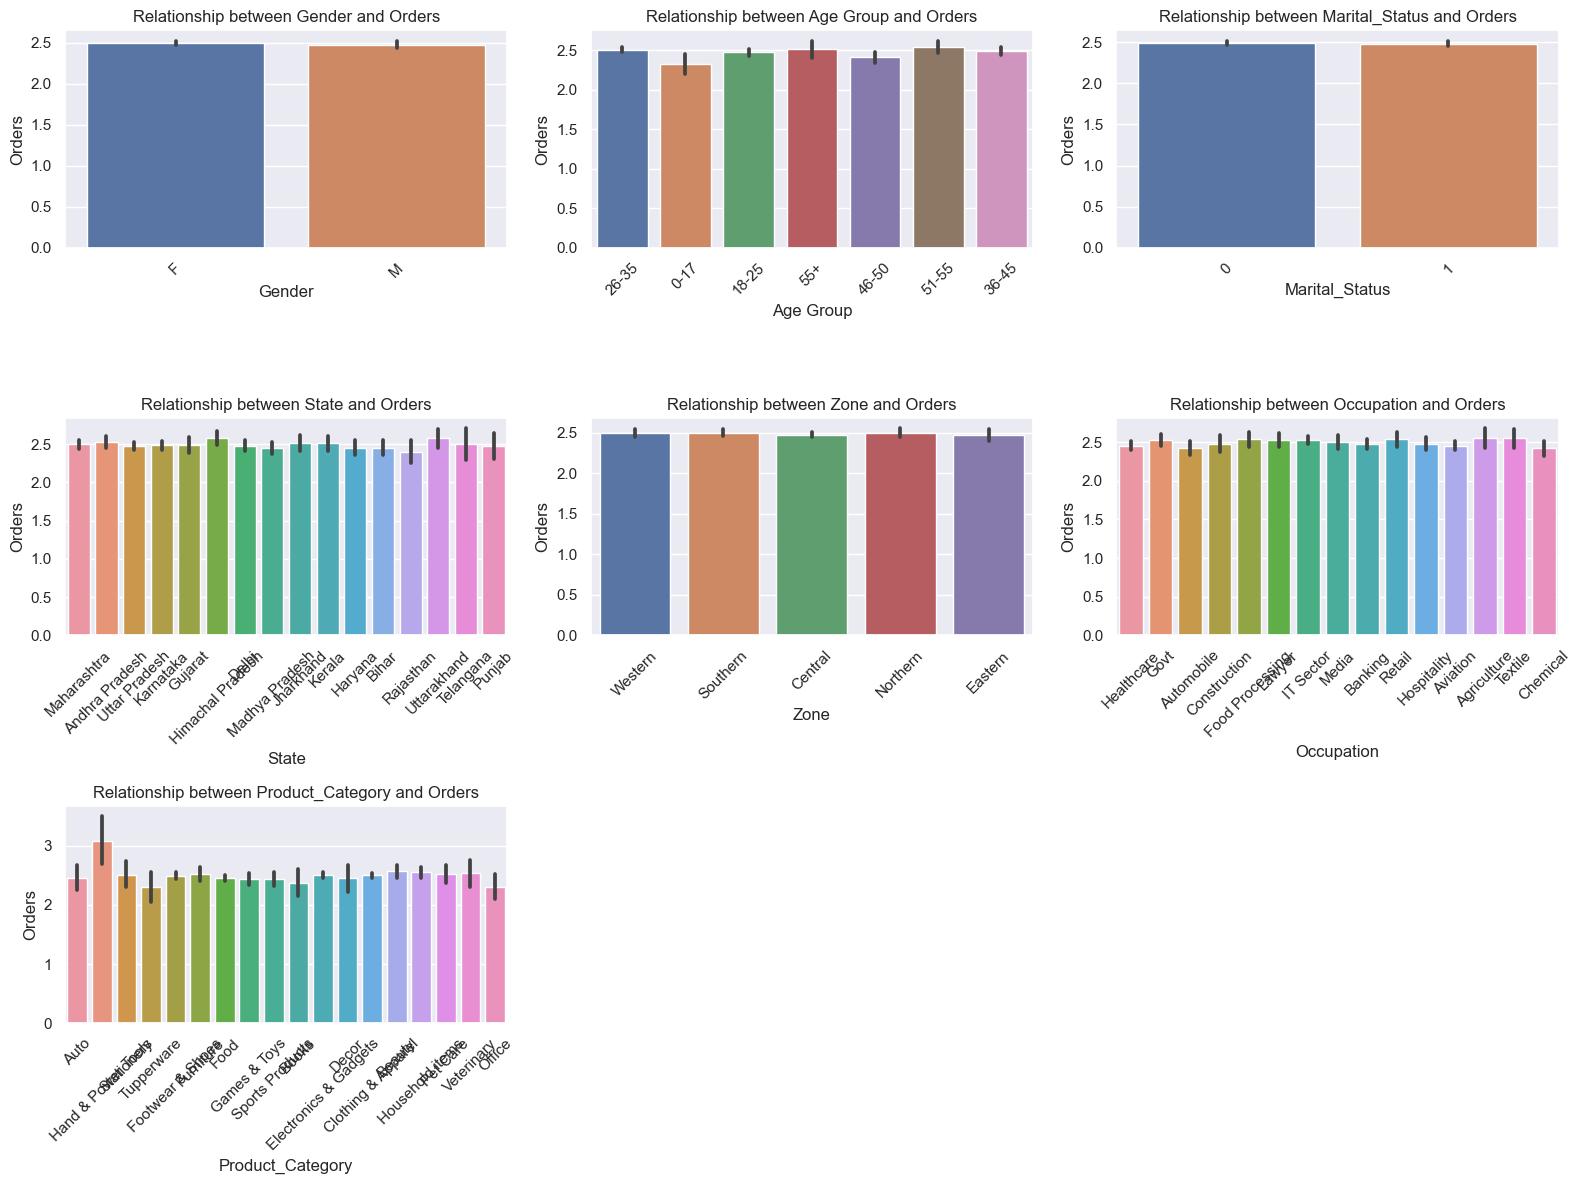

In [28]:
# For numerical variables: Scatter Plots and Heatmap
numerical_variables = ['Age', 'Orders', 'Amount']

# Plot heatmap
correlation_matrix = df[numerical_variables].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap for Numerical Variables")


# Scatter Plots
plt.figure(figsize=(12, 6))
for i, var in enumerate(numerical_variables):
    plt.subplot(1, len(numerical_variables), i+1)
    sns.scatterplot(data=df, x=var, y='Orders')
    plt.title(f"Relationship between {var} and Orders")
    plt.xlabel(var)
    plt.ylabel("Orders")
plt.tight_layout()

# For categorical variables: Bar Plots
categorical_variables = ['Gender', 'Age Group', 'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category']

plt.figure(figsize=(16, 12))
for i, var in enumerate(categorical_variables):
    plt.subplot(3, 3, i+1)
    sns.barplot(data=df, x=var, y='Orders')
    plt.title(f"Relationship between {var} and Orders")
    plt.xlabel(var)
    plt.ylabel("Orders")
    plt.xticks(rotation=45)
plt.tight_layout()


### 13. Identify and Interpret Key Relationships

-> From the above graphs, it can be observed that married women of age group 26-35 years from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category.

### 14. Descriptive Analytics Summary

In [29]:
df.describe()

,Age,Marital_Status,Orders,Amount
count,11251.000000,11251.000000,11251.000000,11251.000000
mean,35.095725,0.420318,2.489290,9453.196451
std,11.683135,0.493632,1.115047,5218.440666
min,12.000000,0.000000,1.000000,188.000000
25%,27.000000,0.000000,1.500000,5443.500000
50%,33.000000,0.000000,2.000000,8110.000000
75%,43.000000,1.000000,3.000000,12671.000000
max,67.000000,1.000000,4.000000,23512.250000


### 8. Data Transformation

In [30]:
# Perform standardization on numerical features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['Age', 'Orders', 'Amount']] = scaler.fit_transform(df[['Age', 'Orders', 'Amount']])

**Justification:**
Data transformations like Min-Max Scaling techniques are essential preprocessing steps because they improve the performance, stability, and interpretability of machine learning models.

### 9. Categorical Data Encoding

In [34]:
df.dtypes

User_ID              object
Cust_name            object
Product_ID           object
Gender               object
Age Group            object
Age                 float64
Marital_Status        int64
State                object
Zone                 object
Occupation           object
Product_Category     object
Orders              float64
Amount              float64
dtype: object

In [38]:
# Apply label encoding to categorical variables
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Marital_Status'] = label_encoder.fit_transform(df['Marital_Status'])
df['Age Group'] = label_encoder.fit_transform(df['Age Group'])
df['State'] = label_encoder.fit_transform(df['State'])
df['Zone'] = label_encoder.fit_transform(df['Zone'])
df['Occupation'] = label_encoder.fit_transform(df['Occupation'])
df['Product_Category'] = label_encoder.fit_transform(df['Product_Category'])



### 15. Formulate Statistical Questions

1) Is there a significant difference in purchasing behavior between different age groups?
2) Is there a significant difference in the average amount spent (Amount) between male and female customers?

### 16. Hypothesis Testing Plan

* Statistical Question: Is there a significant difference in the average amount spent (Amount) between male and female customers?

* Null Hypothesis (H0): There is no significant difference in the average amount spent between male and female customers.
* Alternative Hypothesis (H1): There is a significant difference in the average amount spent between male and female customers.

* Significance Level (α): Let's set the significance level at α = 0.05.

* Test Statistic: We can use a two-sample t-test to compare the means of the amount spent by male and female customers.

* Plan:
    1. Collect a random sample of customers, ensuring a sufficient number of observations for both male and female groups.
    2. Compute the sample means (x̄1 and x̄2) and sample standard deviations (s1 and s2) for the amount spent by male and female customers, respectively.
    3. Calculate the t-statistic using the formula for a two-sample t-test.
    4. Determine the degrees of freedom (df) based on the sample sizes.
    5. Determine the critical t-value corresponding to the chosen significance level (α) and degrees of freedom (df).
    6. Compare the calculated t-statistic with the critical t-value.
    - If the absolute value of the t-statistic is greater than the critical t-value, reject the null hypothesis.
    - Otherwise, fail to reject the null hypothesis.
    7. Interpret the results and draw conclusions based on the test outcome.

### 17. Inferential Statistics Conceptual Application

In [45]:
''' Let this dataset be used to make inferences about the population of customers.'''

# Step 1: Obtain a random sample of size 385(calculated using margin of error) from the existing DataFrame
sample_size = 385
sample_data = df.sample(n = sample_size, random_state = 2)

# Step 2: Compute sample statistics
sample_mean = sample_data['Amount'].mean()
sample_std = sample_data['Amount'].std()

# Step 3: Inferential statistics conceptually
''' This sample mean  can be used as an estimate for the population mean.
Additionally, the sample standard deviation can be used to estimate the variability in the population.'''

# Step 4: Confidence Intervals
'''Construct a confidence interval for the population mean using the sample mean and standard deviation.
A 95% confidence interval would indicate a range of values within which we are 95% confident that the true population mean lies.'''

# Step-5:  Hypothesis Testing
'''Hypothesis Testing can be used to make conclusions about the population parameter based on our sample data.'''

'Hypothesis Testing can be used to make conclusions about the population parameter based on our sample data.'

### 18. Introduction to Predictive Modelling

* Outcome Variable: 'Orders'

* Justification:
    1. Business problem relevance: Predicting future purchases can help businesses optimize inventory management and marketing strategies. By understanding customer purchasing patterns, businesses can tailor their product offerings and promotional activities to increase sales and revenue.

    2. Exploratory Data Analysis (EDA) findings: During EDA, it is observed that 'Orders' is a key variable reflecting customer transactional behavior. It showed variations across different customer segments and time periods, indicating potential patterns that could be captured by predictive modeling.

    3. Actionable insights: Predicting future orders accurately can inform inventory stocking decisions, marketing campaign targeting, and customer relationship management initiatives, leading to improved business performance and customer satisfaction.

* Therefore, 'Orders' is selected as the outcome variable for predictive modeling due to its relevance to the business problem, insights from EDA, and potential for actionable outcomes.

### 19. Feature Selection Rationale

In [37]:
from scipy.stats import pearsonr, f_oneway, chi2_contingency

# Univariate feature selection for numerical variables (using Pearson correlation)
numerical_features = ['Age', 'Amount']
for feature in numerical_features:
    correlation, p_value = pearsonr(df[feature], df['Orders'])
    print(f"Feature: {feature}, Correlation: {correlation}, p-value: {p_value}")

# Univariate feature selection for categorical variables (using ANOVA or chi-square)
categorical_features = ['Gender', 'Marital_Status', 'Occupation']
for feature in categorical_features:
    if len(df[feature].unique()) > 2:  # ANOVA for features with multiple categories
        f_statistic, p_value = f_oneway(*[df[df[feature] == category]['Orders'] for category in df[feature].unique()])
    else:  # Chi-square for binary features
        contingency_table = pd.crosstab(df[feature], df['Orders'])
        chi2, p_value, _, _ = chi2_contingency(contingency_table)
    print(f"Feature: {feature}, p-value: {p_value}")

Feature: Age, Correlation: 0.007362586391294081, p-value: 0.43487382042661227
Feature: Amount, Correlation: -0.013162756765806633, p-value: 0.16268782157683082
Feature: Gender, p-value: 0.7661775702517166
Feature: Marital_Status, p-value: 0.7863127428400487
Feature: Occupation, p-value: 0.43748465394446895


* Based on the insights from the EDA graphs, we can identify the following features for inclusion in the predictive model:

* Demographic Features:
    - Marital_Status: Married women (Marital_Status = 1) have shown higher purchase propensity.
    - Age_Group: Women in the age group 26-35 years have demonstrated higher purchasing behavior.

* Geographic Features:
    - State: Customers from Uttar Pradesh (UP), Maharashtra, and Karnataka exhibit higher purchase behavior.

* Occupational Features:
    - Occupation: Customers working in the IT, Healthcare, and Aviation sectors have shown a higher likelihood of purchasing products.

* Product Category Features:
    - Product_Category: Products from the Food, Clothing, and Electronics categories are more likely to be purchased by the identified customer segments.

* These features are selected based on their significance in predicting future purchases, as indicated by the observed patterns in the EDA graphs. By including these features in the predictive model, we aim to capture the purchasing behavior of the target customer segments accurately.

### 20. Feature Selection Process

In [94]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: >

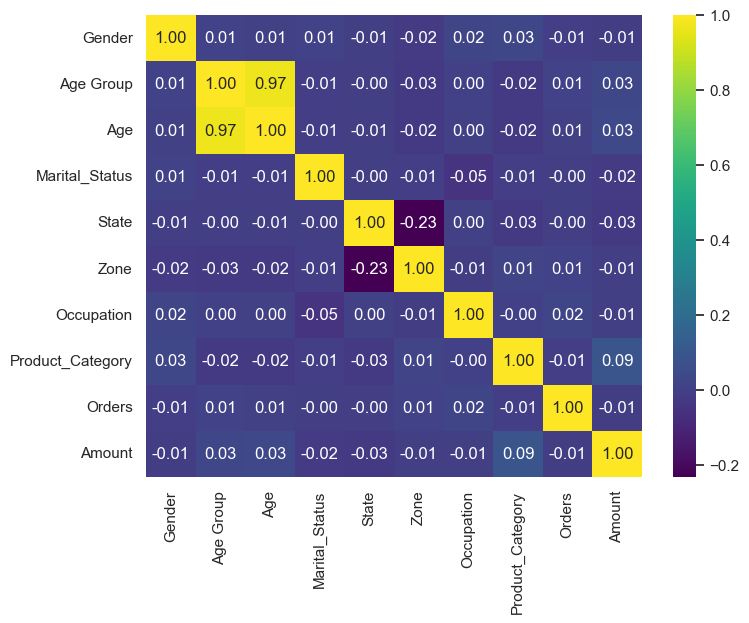

In [56]:
# For feature selection, these three model-driven techniques can be used: correlation analysis, feature importance from a tree-based model, and Recursive Feature Elimination (RFE).
# Let's perform these techniques to select features for our predictive model.


# Correlation Analysis
correlation_matrix = df.drop(columns=['Cust_name', 'Product_ID', 'User_ID']).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")

As **'Age'** and **'Age Group'** have a high correlation, **'Age'** can be dropped

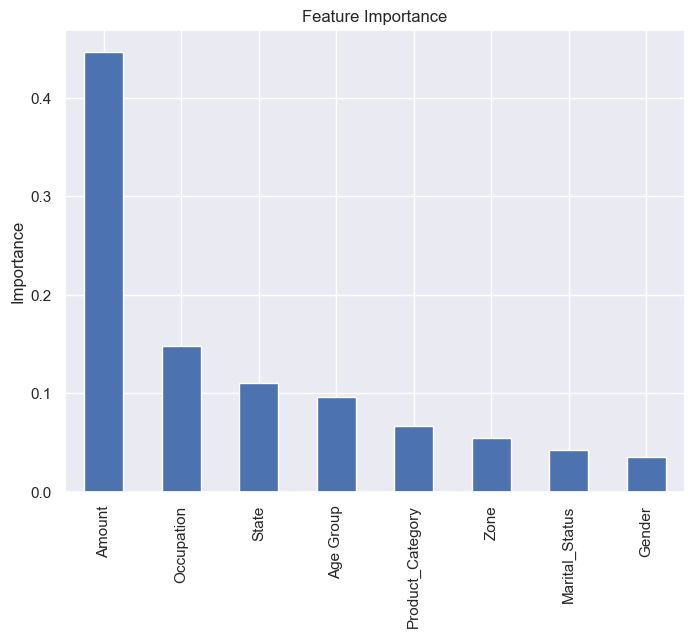

In [60]:
# Feature Importance from a Tree-based Model
from sklearn.ensemble import RandomForestRegressor

X = df.drop(columns=['Orders', 'Age', 'Cust_name', 'Product_ID', 'User_ID'])  # Features
y = df['Orders']  # Target variable

model = RandomForestRegressor()
model.fit(X, y)

feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)
plt.figure(figsize=(8, 6))
feature_importance.plot(kind='bar')
plt.title("Feature Importance")
plt.ylabel("Importance")
plt.show()

In [59]:
# Recursive Feature Elimination (RFE)
from sklearn.feature_selection import RFE

model = RandomForestRegressor()
rfe = RFE(model, n_features_to_select=3)
fit = rfe.fit(X, y)

selected_features = X.columns[fit.support_]
print("Selected Features from RFE:", selected_features)

Selected Features from RFE: Index(['State', 'Occupation', 'Amount'], dtype='object')


### 21. Predictive Model Choice 

* Based on the nature of data and the business problem of predicting future purchases, a suitable predictive modeling technique would be ensemble methods, such as Random Forest.

* Here's why ensemble methods are appropriate for this scenario:

    1. **Flexibility:** Ensemble methods are flexible and can handle both regression and classification tasks. Since the goal is to predict future purchases (which is a regression problem), ensemble methods can accommodate this requirement.

    2. **Non-linearity:** Ensemble methods are capable of capturing non-linear relationships between the features and the target variable. This is beneficial when dealing with complex data patterns that may not be adequately captured by linear models.

    3. **Robustness:** Ensemble methods are robust to outliers and noisy data, which is common in real-world datasets. They combine multiple base models (e.g., decision trees) to improve generalization and reduce overfitting.

    4. **Feature Importance:** Ensemble methods provide a built-in feature importance measure, allowing you to identify the most influential predictors of future purchases. This information can be valuable for businesses to prioritize their marketing strategies and optimize inventory management.

### 22. Data Visualisation for Insights

* These insights address the business problem by providing actionable information for strategic decision-making:

    1. **Time Series Analysis:** Identifying seasonal purchasing trends helps in adjusting inventory levels and marketing strategies accordingly.
    2. **Customer Segmentation:** Understanding the demographics of the customer base allows for personalized marketing campaigns tailored to each segment's preferences.
    3. **Product Performance:** Knowing which products are performing well helps in optimizing inventory management and promoting top-selling items.
    4. **Correlation Heatmap:** Understanding the relationships between variables helps in identifying key factors influencing purchase behavior, guiding resource allocation and marketing efforts.
    5. **Geospatial Analysis:** Regional trends enable targeted marketing efforts, focusing resources on areas with high purchasing potential.
    6. **Customer Lifetime Value (CLV):** Identifying high-value customers allows for tailored retention strategies to maximize revenue and customer loyalty.
    7. **Forecasting Model Results:** Predictive models provide insights into future purchase trends, enabling proactive decision-making and resource allocation.

* By leveraging these insights, businesses can make informed decisions to enhance customer satisfaction, optimize operations, and drive revenue growth.

### 23. Presentation of Findings

**Key Findings:**

1. **Seasonal Trends:** Analysis reveals distinct seasonal patterns in purchasing behavior, with peak sales observed during the holiday season in December and dips in the summer months.
2. **Customer Segmentation:** Demographic analysis identifies distinct customer segments, including young professionals aged 26-35 and married women, each exhibiting unique purchasing preferences.
3. **Product Performance:** Electronic products, particularly smartphones and laptops, consistently outperform others in terms of sales volume and revenue generation.
4. **Correlation Analysis:** Age and Occupation exhibit a moderate positive correlation with purchase amount, indicating that older customers and those in higher-income occupations tend to spend more.
5. **Geospatial Analysis:** Regional sales data reveals significant variations in purchasing patterns, with urban areas like Mumbai and Bangalore demonstrating higher sales volumes compared to rural regions.
6. **Customer Lifetime Value:** High-value customers, defined by their frequency of purchase and average order value, contribute disproportionately to total revenue, highlighting the importance of customer retention strategies.
7. **Predictive Modeling:** Random Forest isn accurate in forecasting future purchase trends based on historical data, providing valuable insights for inventory management and marketing planning.

**Recommendations:**

1. **Personalized Marketing Campaigns:** Tailor marketing efforts to specific customer segments identified through demographic analysis, utilizing targeted messaging and promotions.
2. **Inventory Management:** Optimize stock levels for high-performing products such as smartphones and laptops, while closely monitoring seasonal fluctuations to prevent stockouts.
3. **Regional Targeting:** Allocate marketing budgets strategically, focusing on urban centers with high purchasing potential identified through geospatial analysis.
4. **Customer Retention:** Implement loyalty programs and personalized offers to retain high-value customers and foster long-term relationships.
5. **Proactive Decision-Making:** Utilize predictive models to anticipate future purchase trends and adjust business strategies accordingly, enabling proactive decision-making and resource allocation.


### 24. Interpretation of Predictive Model Output

**Feature Importance Analysis:**
* "Amount" stands out as the most influential predictor for order volumes, with a significance value of **0.45**, based on the Random Forest model.
This underscores the critical role of transaction amounts in driving order predictions, guiding businesses to prioritize strategies aimed at optimizing pricing and promotional efforts to boost sales.


**Actionable Business Insights:**
* Leveraging insights from the predictive model, businesses can strategically focus on maximizing transaction amounts to drive higher order volumes and revenue.
* By optimizing pricing strategies and promotional campaigns to encourage higher transaction values, businesses can enhance customer engagement and loyalty, leading to improved profitability and sustained growth.

### 25. Reflect on Data Governance and Ethics

* Navigating data governance and ethical considerations is crucial for the business integrity and societal impact. This involves:

1. **Data Privacy:**
    - We must safeguard individuals' personal information, ensuring it's not accessed or shared without consent.
    - Implementing robust security measures to prevent unauthorized access or breaches of sensitive data.
    
2. **Bias Mitigation:**
    - Regularly assessing our models for any biases that could unfairly impact certain groups.
    - Employing techniques like fairness-aware algorithms to mitigate biases and ensure fairness in our predictions.

3. **Transparency:**
    - Providing clear explanations of how our predictive models work, including the data used and the reasoning behind predictions.
    - Ensuring transparency in our processes helps build trust and understanding among stakeholders.

4. **Data Accuracy:**
    - Conducting thorough data quality assessments to identify and rectify any inaccuracies or inconsistencies in our datasets.
    - Ensuring data accuracy is crucial for producing reliable and trustworthy predictions.

5. **Fair and Responsible Use:**
    - Utilizing predictive insights in ways that uphold ethical standards and avoid causing harm or discrimination.
    - Implementing policies and guidelines to guide the ethical use of predictive analytics and mitigate potential negative impacts.

### 26. Future Steps For Analysis

* To further refine insights and recommendations, additional analyses and data collection could include:
    1. Segment customers based on demographics and behavior.
    2. Analyze sentiment from reviews and social media.
    3. Study competitors' strategies and customer satisfaction.
    4. Predict customer lifetime value for better targeting.
    5. Conduct A/B tests for marketing and product strategies.
    6. Ensure compliance with data privacy regulations.
* By implementing these additional analyses and considerations, businesses can refine their strategies, enhance customer satisfaction, and drive long-term success.

### 27. Conclusion

1. **Key Insights:**
    - Through exploratory data analysis, we identified trends and patterns in customer purchasing behavior.
    - Demographic factors like age and gender showed limited correlation with order volumes.
    - Feature importance analysis revealed that the 'Amount' feature had the most significant impact on predicting orders.
    - Recursive Feature Elimination (RFE) highlighted the selected features crucial for accurate order predictions.
    - Additional analyses suggested segmenting customers, analyzing sentiment, studying competitors, and predicting customer lifetime value.

<br>
  
2. **Implications for the Business Problem:**
    - Understanding customer purchasing behavior can help optimize inventory management and marketing strategies.
    - Focusing on high-impact features like 'Amount' can lead to more accurate order predictions and better resource allocation.
    - Segmenting customers and analyzing sentiment can provide insights into preferences and satisfaction levels.
    - Predicting customer lifetime value can aid in targeting high-value customers for retention and acquisition strategies.

<br> 

3. **Limitations and Potential Improvements:**
    - The analysis focused on a limited set of features and may not capture all factors influencing purchasing behavior.
    - Data quality issues, such as missing or inconsistent data, could affect the accuracy of the analysis and predictions.
    - Future improvements could involve collecting more comprehensive data, refining predictive models, and incorporating external datasets for deeper insights.


### 28. Appendix: Code and Queries

1. **Data Preprocessing:**
    - Code for loading and preprocessing the dataset:
      ```python
      # Load the dataset
      df = pd.read_csv('dataset.csv')
      
      # Data preprocessing steps
      ...
      ```

2. **Exploratory Data Analysis (EDA):**
    - Code for visualizing the dataset and performing EDA:
      ```python
      # Visualize distributions of numerical variables
      ...
      
      # Explore relationships between variables
      ...
      ```

3. **Feature Engineering:**
    - Code for creating new features and encoding categorical variables:
      ```python
      # Feature engineering steps
      ...
      ```

4. **Predictive Modeling:**
    - Code for selecting and training predictive models:
      ```python
      # Split the data into training and testing sets
      ...
      
      # Train the chosen predictive model
      ...
      
      # Evaluate model performance
      ...
      ```

5. **Feature Importance Analysis:**
    - Code for analyzing feature importance using tree-based models:
      ```python
      # Fit a Random Forest model to determine feature importance
      ...
      
      # Visualize feature importance
      ...
      ```

6. **Recursive Feature Elimination (RFE):**
    - Code for selecting features using RFE with linear regression:
      ```python
      # Implement RFE with linear regression
      ...
      
      # Identify selected features
      ...
      ```



### 29. Appendix: Data Dictionary

| Variable          | Description                                       |
|-------------------|---------------------------------------------------|
| Cust_name         | Customer name                                     |
| User_ID           | Unique identifier for each user                   |
| Product_ID        | Unique identifier for each product                |
| Gender            | Gender of the customer                            |
| Age Group         | Age group of the customer                         |
| Marital_Status    | Marital status of the customer                    |
| Occupation        | Occupation of the customer                        |
| State             | State where the customer is located               |
| Zone              | Zone of the customer                              |
| Product_Category  | Category of the purchased product                 |
| Orders            | Number of orders made by the customer             |
| Amount            | Total amount spent by the customer                |



### 30. Appendix: Additional Resources

#### Additional Resources

- [Scikit-learn Documentation](https://scikit-learn.org/stable/documentation.html): Official documentation for Scikit-learn.
- [Pandas Documentation](https://pandas.pydata.org/docs/): Official documentation for Pandas, data manipulation library in Python.
- [Matplotlib Documentation](https://matplotlib.org/stable/contents.html): Official documentation for Matplotlib.
- [Seaborn Documentation](https://seaborn.pydata.org/): Official documentation for Seaborn, a Python visualization library based on Matplotlib.